In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

In [2]:
df = pd.read_csv('04_02_emisiones.csv', delimiter=";")

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Marca     91 non-null     object 
 1   Longitud  91 non-null     float64
 2   Anchura   91 non-null     float64
 3   Altura    91 non-null     float64
 4   Maletero  91 non-null     int64  
 5   CO2       91 non-null     int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 4.4+ KB
None


In [4]:
y = df[['CO2']]
X = df[['Longitud', 'Anchura', 'Altura']]

- Regresión Lineal Múltiple (MLR): técnica estadística que utiliza varias variables explicativas para predecir el resultado de una variable de respuesta. 

- Desafío: Predecir el dióxido de carbono que emite un automóvil a partir de su longitud, anchura y altura.
    1. Dividir los datos en conjuntos de entrenamiento y prueba. Usaremos un 20% de nuestros datos para validación.
    2. Crear un modelo de regresión lineal múltiple. 
    3. Hacer predicciones basadas en el modelo con los datos de prueba.
    4. Obtener el error absoluto medio, el error cuadrático medio y la raíz del error cuadrático medio. 

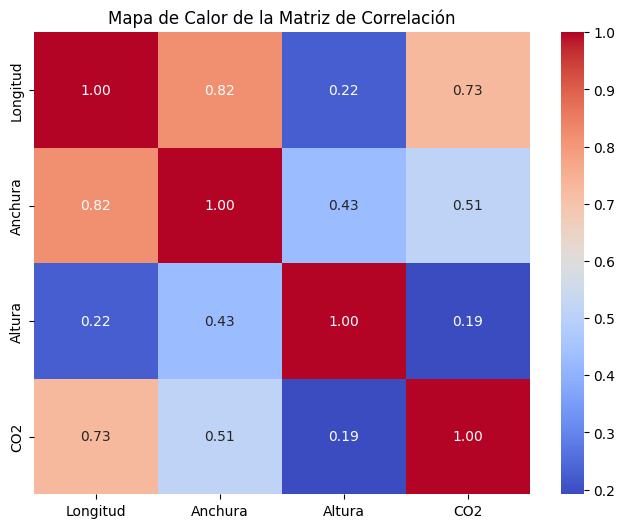

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

matriz_correlacion = df[['Longitud', 'Anchura', 'Altura', 'CO2']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [7]:
mae = metrics.mean_absolute_error(y_test, y_pred)
print(f'Error Absoluto Medio (MAE): {mae}')

mse = metrics.mean_squared_error(y_test, y_pred)
print(f'Error Cuadrático Medio (MSE): {mse}')

rmse = np.sqrt(mse)
print(f'Raíz Error Cuadrático Medio (RMSE): {rmse}')

Error Absoluto Medio (MAE): 30.752739725416358
Error Cuadrático Medio (MSE): 2006.8747303572968
Raíz Error Cuadrático Medio (RMSE): 44.79815543476424
